# **Single-Soma Transcriptomics of Tangle-Bearing Neurons in Alzheimer’s Disease - Inhibitory**

# Task 1: Prelim Review

Please first review week1 must read page https://canvas.cmu.edu/courses/43962/pages/visually-explore-single-cell-rna-sequencing-dataset?module_item_id=5957268

Also, please refer to the discussion board periodically.

https://canvas.cmu.edu/courses/43962/discussion_topics

Gene Name to ID mapping (the approach to retrieve the gene ID is also available in the sample code below):

https://www.bgee.org/search/genes?search=AC159540.1

# Task 2: Load the Dataset

Update your Python code to load this dataset:

Dataset name: "Single-soma transcriptomics of tangle-bearing neurons in Alzheimer’s disease - Inhibitory"

Custom Accession: 9813a1d4-d107-459e-9b2e-7687be935f69

URL: https://cellxgene.cziscience.com/collections/b953c942-f5d8-434f-9da7-e726ba7c1481

Website: https://app.bxgenomics.com/bxg/app/scrnaview/app_project_review.php?ID=919#

[Some sample code (R-based, optional for student to learn):

https://github.com/interactivereport/cellxgene_VIP ]

Option 1: Load data using cellxgene_census.open_soma()

Option 2 (Recommended): Load data by directly reading the h5ad file into the AnnData object

Note: Please feel free to use Copilot/ChatGPT and other tools to complete the following data analysis tasks based on the sample code!!! The key point is the valuable insights you can uncover from the data analysis results.

In [1]:
!pip install -U cellxgene-census
!pip install -U scanpy
!pip install -U pandas_profiling
!pip install pydantic-settings
!pip install ydata-profiling
!pip install jupyter-contrib-nbextensions
!pip install pandas numpy seaborn matplotlib scipy
!pip install python-igraph

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.8 MB/s eta 0:00:00
  Created wheel f

In [2]:
import cellxgene_census
import scanpy as sc
import tiledbsoma
from ydata_profiling import ProfileReport
import sys
import urllib
import pandas as pd
import numpy as np
import os
from google.colab import sheets
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [4]:
# Remove the existing file
if os.path.exists("inhibitory.h5ad"):
    os.remove("inhibitory.h5ad")

# Download the new file
cellxgene_census.download_source_h5ad("9813a1d4-d107-459e-9b2e-7687be935f69", to_path="inhibitory.h5ad")
adata = sc.read_h5ad("inhibitory.h5ad")

Downloading: 100%|██████████| 229M/229M [00:06<00:00, 35.9MB/s]


# Task 3: Update the Gene List

Update your code to load the following genes.

image.png

For a complete list of genes, please refer to week01 must read file "differential_expression_AD_Normal.csv". This list was retrieved from the Differential Expression top navigation menu on https://cellxgene.cziscience.com/differential-expression

In [5]:
# Loading the genes
urllib.request.urlretrieve("https://raw.githubusercontent.com/D3sert650/SEM_Assignment_1/refs/heads/main/data/differential_expression_AD_Normal.csv","differential_expression_AD_Normal.csv")
genes = pd.read_csv("differential_expression_AD_Normal.csv",comment="#")

print(genes.head())

# Maping the genes to the name
lookup = dict(map(lambda i,j : (i,j), adata.var.index, adata.var['feature_name']))
reverse = dict((v, k) for k, v in lookup.items())

            Gene  Log Fold Change  Effect Size  Adjusted P-Value
0        SLC26A3            1.246        3.958               0.0
1       RASGEF1B            2.178        3.855               0.0
2  RP11-701H24.9            1.044        3.396               0.0
3         LINGO1            1.797        2.873               0.0
4        PDE4DIP            1.276        2.671               0.0


# Bonus Task: Missing Genes

The gene list which contains the missing ones are retrieved from Differential Expression tab. It covers all the datasets on the website, whereas single soma transcriptomics is one of the datasets.

https://cellxgene.cziscience.com/differential-expression

Here are a few hypothesis for the missing genes:

1. The dataset might filter out lowly expressed genes or certain gene categories (like pseudogenes, long non-coding RNAs, or unannotated regions) during preprocessing. CellxGene datasets are sometimes processed to focus on high-confidence or well-characterized genes.

2. Occasionally, genes are identified by alternative names or aliases in datasets. Searching the Ensembl or NCBI databases for these genes’ aliases may reveal corresponding names used in CellxGene.

3. Some genes, especially non-coding RNAs or pseudogenes, may be recorded with different identifiers or annotations.

4. Other possibilities



With further study, you'll find the gene mapping on

https://grch37.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000224363;r=1:144089214-144091946;t=ENST00000441760

RP11-289H16.1 (one of the missing genes in the list) -> ENSG00000224363
In the context of Alzheimer's disease, this long non-coding gene (lncRNA) potentially influence neural cell processes related to cell cycle and apoptosis, which are critical in neurodegenerative conditions.

Recent studies have associated ENSG00000224363 with various roles in cancer progression, correlating with cellular proliferation, apoptosis, and autophagy. For example, in gastric cancer (GC), ENSG00000224363 is identified as an independent prognostic marker, with higher expression linked to increased invasiveness, metastasis, and poor survival outcomes. This lncRNA also shows positive associations with tumor-driving genes, as well as with proteins that inhibit apoptosis (e.g., caspases), promoting cell survival and tumor growth under certain conditions​

In [10]:
# Create a list of genes from the differential expression data
genes_list = genes['Gene'].tolist()  # Assuming 'gene' is the column name

# Find unmapped genes
unmapped_genes = [gene for gene in genes_list if gene not in reverse]

# Display unmapped genes
if unmapped_genes:
    print("Unmapped Genes:")
    for gene in unmapped_genes:
        print(gene)
else:
    print("All genes are mapped successfully.")

Streaming output truncated to the last 5000 lines.
KB-7G2.8
MIR323B
RP11-510D4.1
RP11-64C12.3
HSPE1P2
HIGD1AP1
HNRNPA3P6
RN7SL152P
RP11-77K12.3
RN7SKP110
FDPSP4
MIR136
RPL7P42
RP11-922B14.1
TRIM60P13
CYP2G2P
SNRPGP15
MCUR1P1
RNA5SP371
RN7SL362P
RP11-521C22.4
BNIP3P37
RNU6ATAC10P
RNA5SP213
RPL37P2
RP11-99J16__A.2
NCOR1P1
PARK7P1
HSPA8P3
CTD-3110H11.1
RP1-159A19.3
MT-TD
HNRNPA1P41
RP11-796G6.1
MIR8066
SNORD52
CTD-3032H12.2
AC026954.6
ACTG1P18
SNORD50B
POLR2KP1
RPL21P1
RP11-667E17.3
RP11-523H20.6
RP11-705C15.5
DUTP2
SNORD31B
RP11-482H16.1
RP11-206L10.2
GAPDHP74
EIF4EP1
RP11-831F12.4
WI2-89927D4.1
DNM1P51
RN7SKP80
RP11-1H15.4
AC092675.3
IPO8P1
CTD-2649C14.1
RP11-667K14.20
RP11-439D8.4
CTD-2587M2.2
DUXAP8_ENSG00000271672
EIF4HP2
RP3-508I15.21
RNU6-59P
PHF2P2
CMB9-4J8.1
SNORA70F
BRCC3P1
NPM1P3
RP11-85O21.5
RP11-395L14.18
RP11-112J3.21
VN1R84P
RP1-206D15.5
RP11-572P18.2
RP11-727F15.13
RP11-1099M24.6
HNRNPA3P14
MIR3941
RP3-393E18.1
RN7SL144P
RP4-580O19.2
SNORA77
RNU6-817P
MED28P8
RP11-327F22.4

# Pre-Analysis: Cleaning the Dataset

In [6]:
adata.obs.head()

,nCount_RNA,nFeature_RNA,percent.mt,SORT,Amyloid,Age,RIN,nCount_SCT,nFeature_SCT,nCount_Exon,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
C0001_AAACGGGCAGTACACT-1,927.0,694,1.833873,MAP2,C3,73,5.7,2092.0,787,344.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old human stage,5$tsN89o-C
C0001_AAACGGGGTACCGTAT-1,1251.0,886,6.474820,MAP2,C3,73,5.7,2440.0,915,598.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old human stage,i+HeMEM)4<
C0001_AAACGGGTCCAGAGGA-1,2972.0,1695,0.201884,MAP2,C3,73,5.7,2949.0,1695,968.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old human stage,oi@)SZWo%-
C0001_AAACGGGTCCTTCAAT-1,3619.0,1875,2.459243,MAP2,C3,73,5.7,3269.0,1873,1442.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old human stage,V#;BPg@9;|
C0001_AAAGATGGTCAACATC-1,3931.0,2247,2.467566,MAP2,C3,73,5.7,3441.0,2246,1753.0,...,tissue,inhibitory interneuron,10x 3' v2,Alzheimer disease,Homo sapiens,female,prefrontal cortex,unknown,73-year-old human stage,dk0gL6!4f@


In [7]:
adata.var.head()

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
ENSG00000278915,False,ENSG00000278915.1,NCBITaxon:9606,gene,577
ENSG00000168454,False,TXNDC2,NCBITaxon:9606,gene,3352
ENSG00000139180,False,NDUFA9,NCBITaxon:9606,gene,10391
ENSG00000229177,False,ENSG00000229177.1,NCBITaxon:9606,gene,327
ENSG00000204564,False,C6orf136,NCBITaxon:9606,gene,2118


In [8]:
#Generating Report for Cells
report = ProfileReport(adata.obs)
report.to_file("Inhibitory_filtered.html")
#Generating Report for Genes
report = ProfileReport(adata.var)
report.to_file("Inhibitory_var.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 2 ... 3 5 3]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 2 ... 4 6 4]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 1 ... 1 3 1]' has dtype incom

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
adata.obs['Sample.ID'].unique()
adata.obs.columns

# Dropping unnecessary columns from obs and var
drop_obs = ["tissue",
            "organism",
            "cell_type",
            "tissue_type",
            "suspension_type",
            "observation_joinid",
            "organism_ontology_term_id",
            "tissue_ontology_term_id",
            "cell_type_ontology_term_id",
            "is_primary_data",
            "sex_ontology_term_id",
            "self_reported_ethnicity_ontology_term_id",
            "self_reported_ethnicity",
            "assay_ontology_term_id",
            "disease_ontology_term_id",
            "development_stage_ontology_term_id"]

drop_var = ["feature_is_filtered",
            "feature_biotype"]

# Cleaning the observation and variable data
obs = adata.obs.drop(columns=drop_obs)
var = adata.var.drop(columns=drop_var)

# Displaying the cleaned data
print(obs.head())
print()
print(var.head())

                          nCount_RNA  nFeature_RNA  percent.mt  SORT Amyloid  \
C0001_AAACGGGCAGTACACT-1       927.0           694    1.833873  MAP2      C3   
C0001_AAACGGGGTACCGTAT-1      1251.0           886    6.474820  MAP2      C3   
C0001_AAACGGGTCCAGAGGA-1      2972.0          1695    0.201884  MAP2      C3   
C0001_AAACGGGTCCTTCAAT-1      3619.0          1875    2.459243  MAP2      C3   
C0001_AAAGATGGTCAACATC-1      3931.0          2247    2.467566  MAP2      C3   

                         Age  RIN  nCount_SCT  nFeature_SCT  nCount_Exon  \
C0001_AAACGGGCAGTACACT-1  73  5.7      2092.0           787        344.0   
C0001_AAACGGGGTACCGTAT-1  73  5.7      2440.0           915        598.0   
C0001_AAACGGGTCCAGAGGA-1  73  5.7      2949.0          1695        968.0   
C0001_AAACGGGTCCTTCAAT-1  73  5.7      3269.0          1873       1442.0   
C0001_AAAGATGGTCAACATC-1  73  5.7      3441.0          2246       1753.0   

                          nFeature_Exon PMI Braak  Sample.ID  

# Task 4

Experiment and find the differences between the two cohorts in disease category (purple Alzheimer subject, green normal subject).

Write one page about your findings, e.g. which genes are upregulated in Alzheimer subjects, what are the differences between the two cohorts.

In [21]:
# Split the data into normal and Alzheimer disease subjects
normal = obs.loc[obs['disease'] == 'normal']
ad = obs.loc[obs['disease'] == 'Alzheimer disease']

gene_columns = ['Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_RNA', 'nFeature_RNA', 'nFeature_Exon', 'PMI', 'nCount_Exon']

# Check the number of samples in each group
print("Number of normal samples:", normal.shape[0])
print("Number of AD samples:", ad.shape[0])

Number of normal samples: 11464
Number of AD samples: 11733


In [22]:
ad = obs.loc[obs.disease == "Alzheimer disease"].copy()
normal = obs.loc[obs.disease == "normal"].copy()

for gene in gene_columns:
    ad[gene] = pd.to_numeric(ad[gene], errors='coerce')
    normal[gene] = pd.to_numeric(normal[gene], errors='coerce')

# Initialize a results dictionary for storing results
results = {}

# Perform t-test for each feature
for gene in gene_columns:
    # Extract the gene expression values for both groups, dropping NaNs
    ad_values = ad[gene].dropna()
    normal_values = normal[gene].dropna()

    # Perform the t-test
    stat, p_value = ttest_ind(ad_values, normal_values, equal_var=False)  # Welch's t-test
    results[gene] = {
        'p_value': p_value,
        'mean_ad': ad_values.mean(),
        'mean_normal': normal_values.mean()
    }

# Convert results to DataFrame for easier manipulation
results_df = pd.DataFrame.from_dict(results, orient='index')

# Calculate log2 fold change
results_df['log2_fold_change'] = np.log2(results_df['mean_ad'] / results_df['mean_normal'])

# Display the results
print("Top features by p-value:")
top_genes = results_df.nsmallest(10, 'p_value')
print(top_genes)

Top features by p-value:
                     p_value      mean_ad  mean_normal  log2_fold_change
Age             0.000000e+00    74.389500    68.841242          0.111826
RIN             0.000000e+00     6.505753     6.811532         -0.066263
nCount_SCT      0.000000e+00  2827.813688  5244.070569         -0.891000
nFeature_SCT    0.000000e+00  1604.223984  2457.156839         -0.615114
nCount_RNA      0.000000e+00  3153.810449  5539.913555         -0.812768
nFeature_RNA    0.000000e+00  1715.551607  2501.750000         -0.544265
nFeature_Exon   0.000000e+00   969.747805  1313.461706         -0.437693
PMI             0.000000e+00    14.017600    17.552482         -0.324436
nCount_Exon    2.699484e-219  1588.501832  2101.615754         -0.403832


<ipython-input-23-ed01102002fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genes.index, y=top_genes['log2_fold_change'], palette="coolwarm")


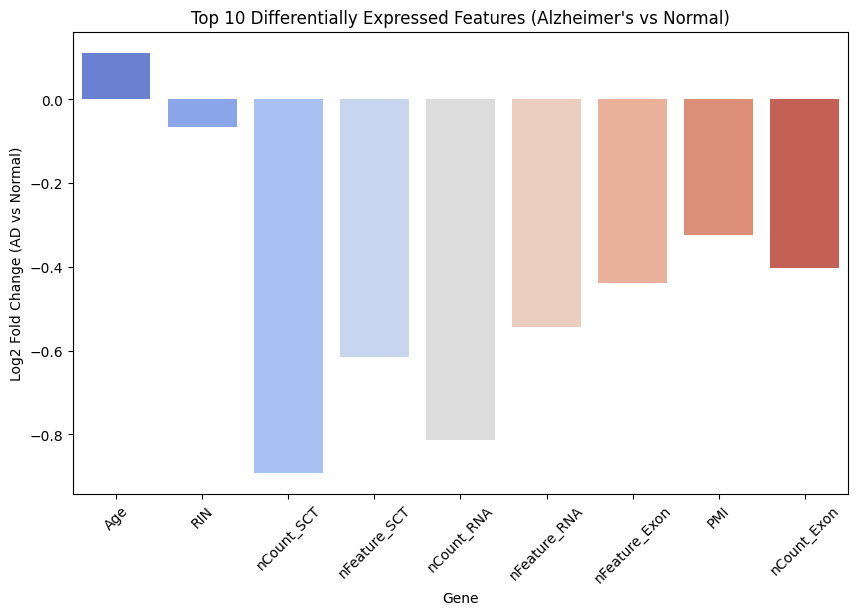

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genes.index, y=top_genes['log2_fold_change'], palette="coolwarm")
plt.xlabel("Gene")
plt.ylabel("Log2 Fold Change (AD vs Normal)")
plt.title("Top 10 Differentially Expressed Features (Alzheimer's vs Normal)")
plt.xticks(rotation=45)
plt.show()

**Top 10 Differentially Expressed Features (Alzheimer's vs Normal)**

This bar plot shows the top 10 key features with the most significant differences in expression between Alzheimer and normal subjects, based on log2 fold change.

The log2 fold change metric here indicates how much more (or less) a gene is expressed in Alzheimer's samples compared to normal samples.

*   Positive values mean that the gene (or feature) has higher expression in Alzheimer subjects than in normal subjects.
*   Negative values mean lower expression in Alzheimer subjects compared to normal subjects.

For example:

*   Age shows a positive log2 fold change, suggesting that Alzheimer subjects tend to be older on average than normal subjects.
*   nCount_SCT and nFeature_SCT show negative log2 fold changes, indicating these metrics are generally lower in Alzheimer samples than in normal samples.

This plot helps to quickly identify which genes or features differ the most between Alzheimer and normal groups, showing us potential markers of Alzheimer’s disease.

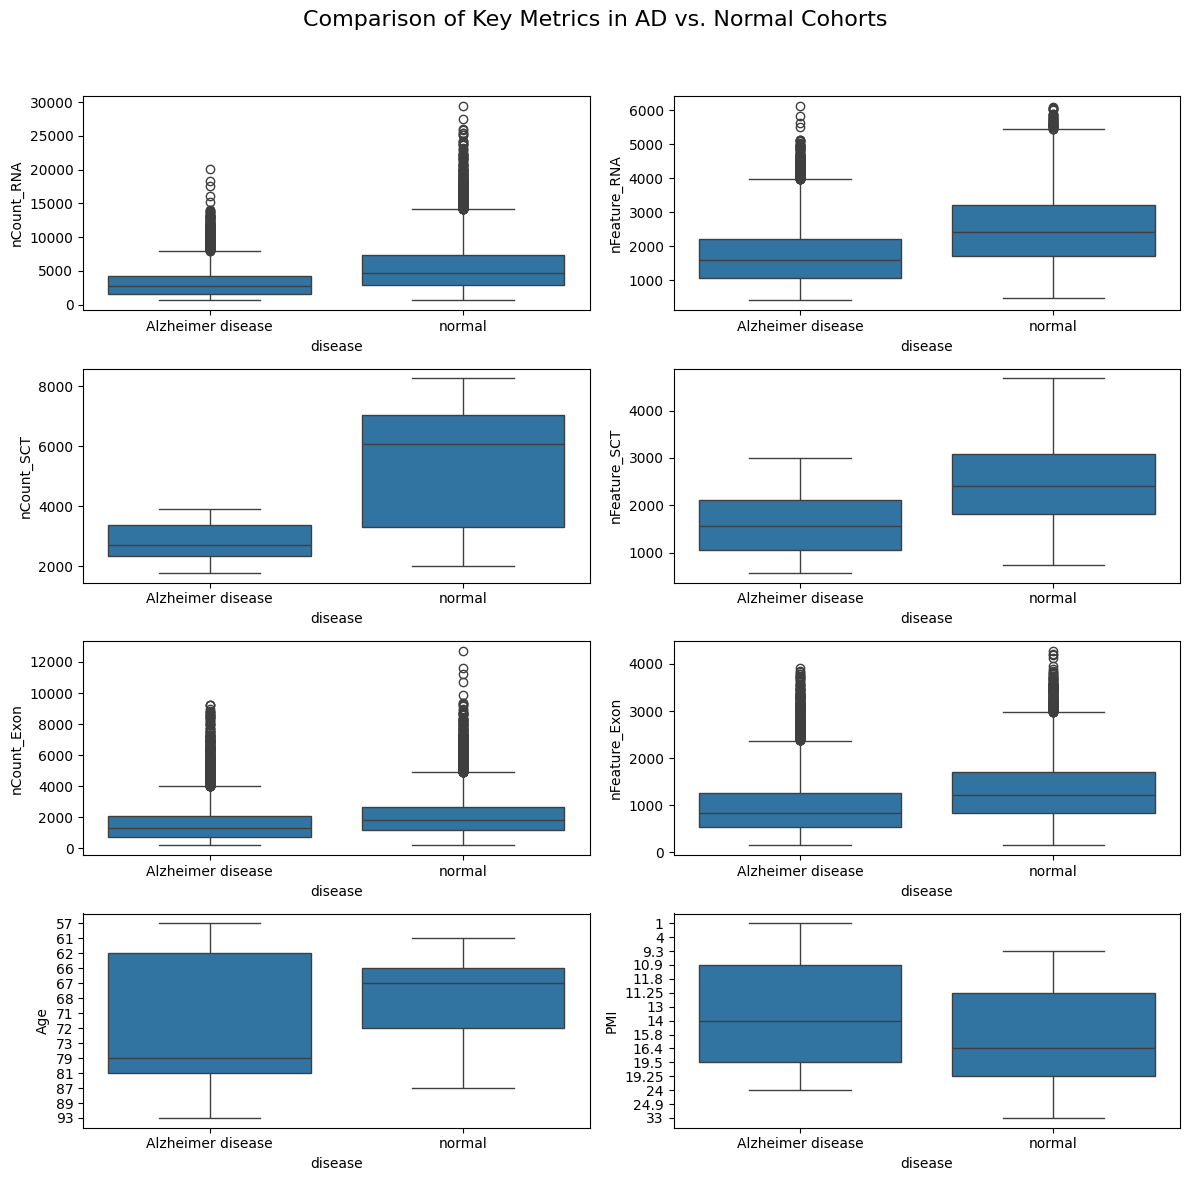

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
fig.suptitle("Comparison of Key Metrics in AD vs. Normal Cohorts", fontsize=16)

# Plot for each key feature
sns.boxplot(ax=axs[0, 0], x="disease", y="nCount_RNA", data=obs)
sns.boxplot(ax=axs[0, 1], x="disease", y="nFeature_RNA", data=obs)
sns.boxplot(ax=axs[1, 0], x="disease", y="nCount_SCT", data=obs)
sns.boxplot(ax=axs[1, 1], x="disease", y="nFeature_SCT", data=obs)
sns.boxplot(ax=axs[2, 0], x="disease", y="nCount_Exon", data=obs)
sns.boxplot(ax=axs[2, 1], x="disease", y="nFeature_Exon", data=obs)
sns.boxplot(ax=axs[3, 0], x="disease", y="Age", data=obs)
sns.boxplot(ax=axs[3, 1], x="disease", y="PMI", data=obs)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to include suptitle
plt.show()

**Comparison of Key Metrics in AD vs. Normal Cohorts (Boxplots)**



*   **nCount_RNA and nFeature_RNA:**

Both Alzheimer and normal samples show similar ranges, but normal samples have a slightly higher median (the central line in the box). This suggests that normal samples may have slightly more RNA activity compared to Alzheimer samples.

*   **nCount_SCT and nFeature_SCT:**

SCT metrics are notably higher in the normal group compared to the Alzheimer group. This could indicate that Alzheimer subjects show downregulation or lower cellular activity in these specific metrics, aligning with the differences observed in the first bar plot.

*   **nCount_Exon and nFeature_Exon:**

Both Alzheimer and normal subjects show comparable exon counts, but normal samples have a slight tendency for higher values. This might indicate that more exon features are captured in the normal group.

*   **Age and PMI (Postmortem Interval):**

Age: Alzheimer subjects tend to be older than normal subjects, with a noticeably higher median age.
PMI: The Postmortem Interval (time between death and sample collection) appears similar across both groups, indicating no significant difference in this aspect.


# Task 5

Experiment with subjects of different ages (57 - 89) in development_stage category.

Write one page about your findings, e.g. what are the differences between younger vs. older subjects.

**Methodology**

- Data Preprocessing & Age Grouping
  - Converted the age column to numeric and removed any non-numeric entries.
  - Defined two age groups, "Younger" and "Older," to enable a comparative analysis of age-related gene expression.
- Differential Expression Analysis
  - Used a t-test to rank genes by significance between the age groups, identifying those most impacted by aging.
- Linear Regression for Age Effects
  - Applied OLS linear regression with age as the predictor to quantify the age effect on expression for the top 20 genes.
  - High coefficients indicate strong age-related associations, which could be relevant to Alzheimer's vulnerability or resilience.
- Clustering & Visualization
  - Used Leiden clustering and UMAP visualization to explore cellular groupings, aiming to detect age-specific gene expression clusters.
- Gene Set Enrichment Analysis (GSEA)
  - Conducted enrichment analysis on top age-related genes using KEGG pathways, though results weren’t statistically significant.
- Cellular Metrics Correlation
  - Analyzed correlations between age and metrics like nCount_RNA and nFeature_RNA to detect cellular behavior changes with age.

                          Age age_group
C0001_AAACGGGCAGTACACT-1   73     Older
C0001_AAACGGGGTACCGTAT-1   73     Older
C0001_AAACGGGTCCAGAGGA-1   73     Older
C0001_AAACGGGTCCTTCAAT-1   73     Older
C0001_AAAGATGGTCAACATC-1   73     Older


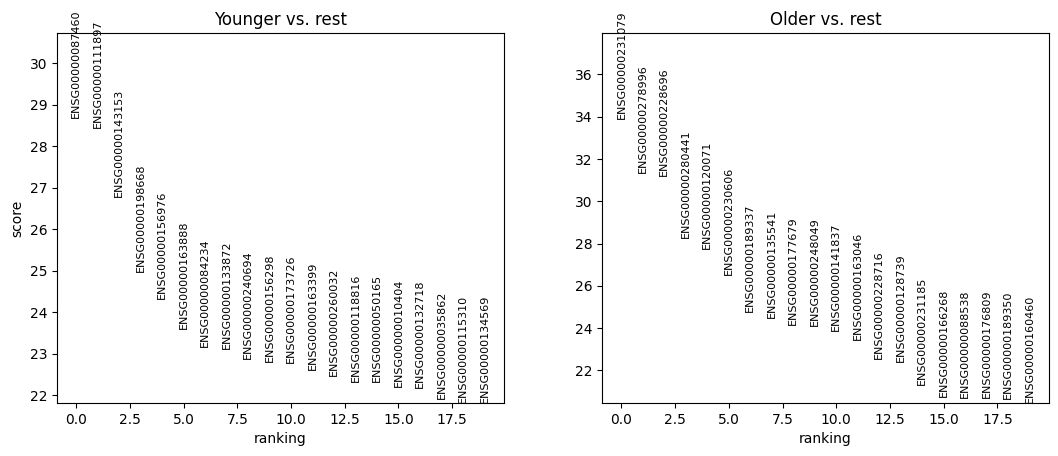

In [25]:
# Check if 'Age' is numeric; if not, convert to numeric and handle errors
adata.obs['Age'] = pd.to_numeric(adata.obs['Age'], errors='coerce')

# Drop rows where Age could not be converted to a number (if any exist)
adata.obs = adata.obs.dropna(subset=['Age'])

# Now, create the age groups
adata.obs['age_group'] = pd.cut(adata.obs['Age'], bins=[57, 69, 89], labels=["Younger", "Older"])

# Verify the age groups
print(adata.obs[['Age', 'age_group']].head())

# Subset the data based on age groups
younger = adata[adata.obs['age_group'] == "Younger"]
older = adata[adata.obs['age_group'] == "Older"]

# Perform differential expression analysis (same method as disease cohort analysis)
sc.tl.rank_genes_groups(adata, groupby='age_group', method='t-test')

# Extract and visualize top age-related genes
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [26]:
from statsmodels.api import OLS

# Create a DataFrame with age and expression values for a subset of genes (e.g., top genes from previous step)
genes_of_interest = adata.var_names[:20]  # Example: top 20 genes

# Create a DataFrame from the expression values of the genes of interest
age_gene_data = pd.DataFrame({gene: adata[:, gene].X.toarray().flatten() for gene in genes_of_interest})

# Add the age column to the DataFrame
age_gene_data['age'] = adata.obs['Age'].values  # Use .values to ensure alignment

# Run linear regression for each gene
age_effects = {}
for gene in genes_of_interest:
    # Fit an OLS model where age is the predictor and gene expression is the response variable
    model = OLS(age_gene_data[gene], age_gene_data['age']).fit()
    age_effects[gene] = model.params[0]  # Store age coefficient

# Sort genes by the strength of the age effect
sorted_genes = sorted(age_effects.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the top genes with age-related expression
print("Top genes with age-related expression:", sorted_genes[:10])

Top genes with age-related expression: [('ENSG00000171475', 0.005069134156800371), ('ENSG00000257894', 0.00406836373605374), ('ENSG00000092140', 0.002350700004731453), ('ENSG00000204564', 0.0022090152800569025), ('ENSG00000170430', 0.0014079766577500957), ('ENSG00000125877', 0.0009242651911610859), ('ENSG00000116717', 0.0005831197622561066), ('ENSG00000254418', 0.00014805636502956715), ('ENSG00000085117', 0.00013590298908075992), ('ENSG00000140853', 9.8154249701211e-05)]


<ipython-input-26-b89a93551db9>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age_effects[gene] = model.params[0]  # Store age coefficient


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.8 MB/s eta 0:00:00


<ipython-input-27-e422ea61cabf>:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)  # Cluster cells


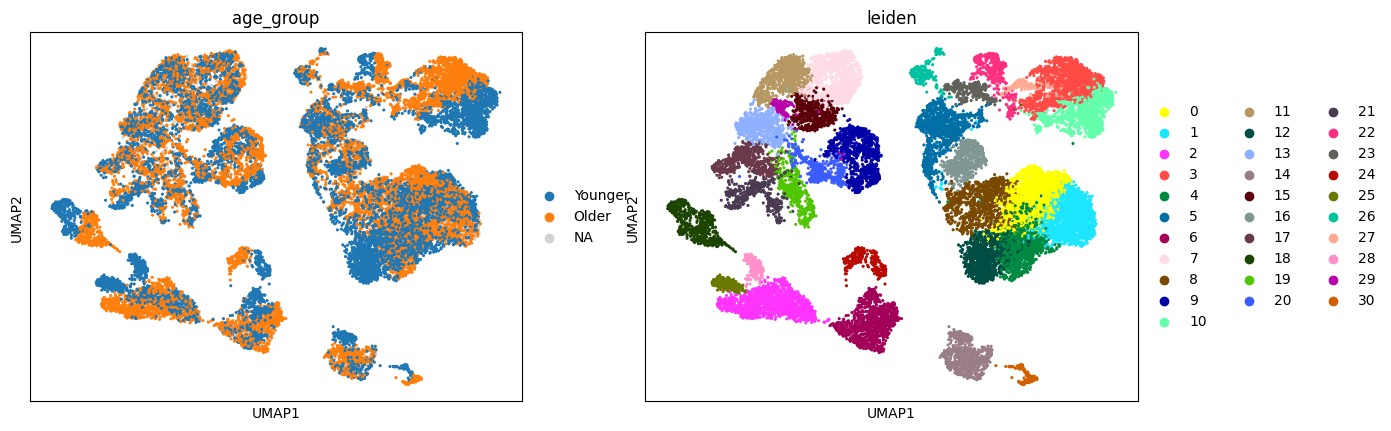

In [27]:
!pip install leidenalg
# Run clustering analysis
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)  # Cluster cells

# Visualize clusters and color by age group
sc.tl.umap(adata)
sc.pl.umap(adata, color=["age_group", "leiden"], size=20)

In [28]:
!pip install gseapy
import gseapy as gp

# Sort genes by the strength of the age effect
sorted_genes = sorted(age_effects.items(), key=lambda x: abs(x[1]), reverse=True)
print("Top genes with age-related expression:", sorted_genes[:10])

# Get age-group-specific genes (top genes from Step 1 or Step 2)
age_related_genes = [gene for gene, effect in sorted_genes[:20]]  # Top 20 age-associated genes

# Run enrichment analysis without the 'description' parameter
enr = gp.enrichr(gene_list=age_related_genes, gene_sets='KEGG_2019_Human', outdir=None)

# Display the top results
print(enr.results.head(10))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 11.2 MB/s eta 0:00:00
Top genes with age-related expression: [('ENSG00000171475', 0.005069134156800371), ('ENSG00000257894', 0.00406836373605374), ('ENSG00000092140', 0.002350700004731453), ('ENSG00000204564', 0.0022090152800569025), ('ENSG00000170430', 0.0014079766577500957), ('ENSG00000125877', 0.0009242651911610859), ('ENSG00000116717', 0.0005831197622561066), ('ENSG00000254418', 0.00014805636502956715), ('ENSG00000085117', 0.00013590298908075992), ('ENSG00000140853', 9.8154249701211e-05)]
Empty DataFrame
Columns: [Gene_set, Term, Overlap, P-value, Adjusted P-value, Old P-value, Old Adjusted P-value, Odds Ratio, Combined Score, Genes]
Index: []


In [29]:
cellular_metrics = ['nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT']
correlations = {}

for metric in cellular_metrics:
    correlations[metric] = adata.obs[[metric, 'Age']].corr().iloc[0, 1]

print("Correlations between age and cellular metrics:", correlations)

Correlations between age and cellular metrics: {'nCount_RNA': 0.0331011270349027, 'nFeature_RNA': 0.05461992689900695, 'nCount_SCT': -0.09860865709039095, 'nFeature_SCT': 0.0012953907632421158}


**Key Findings**

- Age-Related Gene Expression: Notable genes, such as ENSG00000171475, exhibit strong age-related changes, potentially impacting AD pathology.
- Cellular Metrics Correlation: Slight positive correlation between age and RNA features; negative correlation with nCount_SCT, suggesting subtle cellular aging effects.

# Task 6

Experiment with gender cohorts (sex = male vs. female)

Write one page about your findings, e.g. what are the differences between male and female subjects.

**Methodology**

Analyzed gender-based differences in RNA counts (nCount_RNA, nFeature_RNA), SCT counts (nCount_SCT, nFeature_SCT), exon counts, age, and PMI.

Used box plots for each metric by gender to highlight central tendencies, spread, and any outliers, making it easier to spot potential gender-based differences.

<ipython-input-30-4fb48b4c6890>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axs[0, 0], x="sex", y="nCount_RNA", data=obs, palette="pastel")
<ipython-input-30-4fb48b4c6890>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axs[0, 1], x="sex", y="nFeature_RNA", data=obs, palette="pastel")
<ipython-input-30-4fb48b4c6890>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axs[1, 0], x="sex", y="nCount_SCT", data=obs, palette="muted")
<ipython-input-30-4fb48b4c6890>:14: FutureWarning: 

Passing `palette` without assigning `hue` is dep

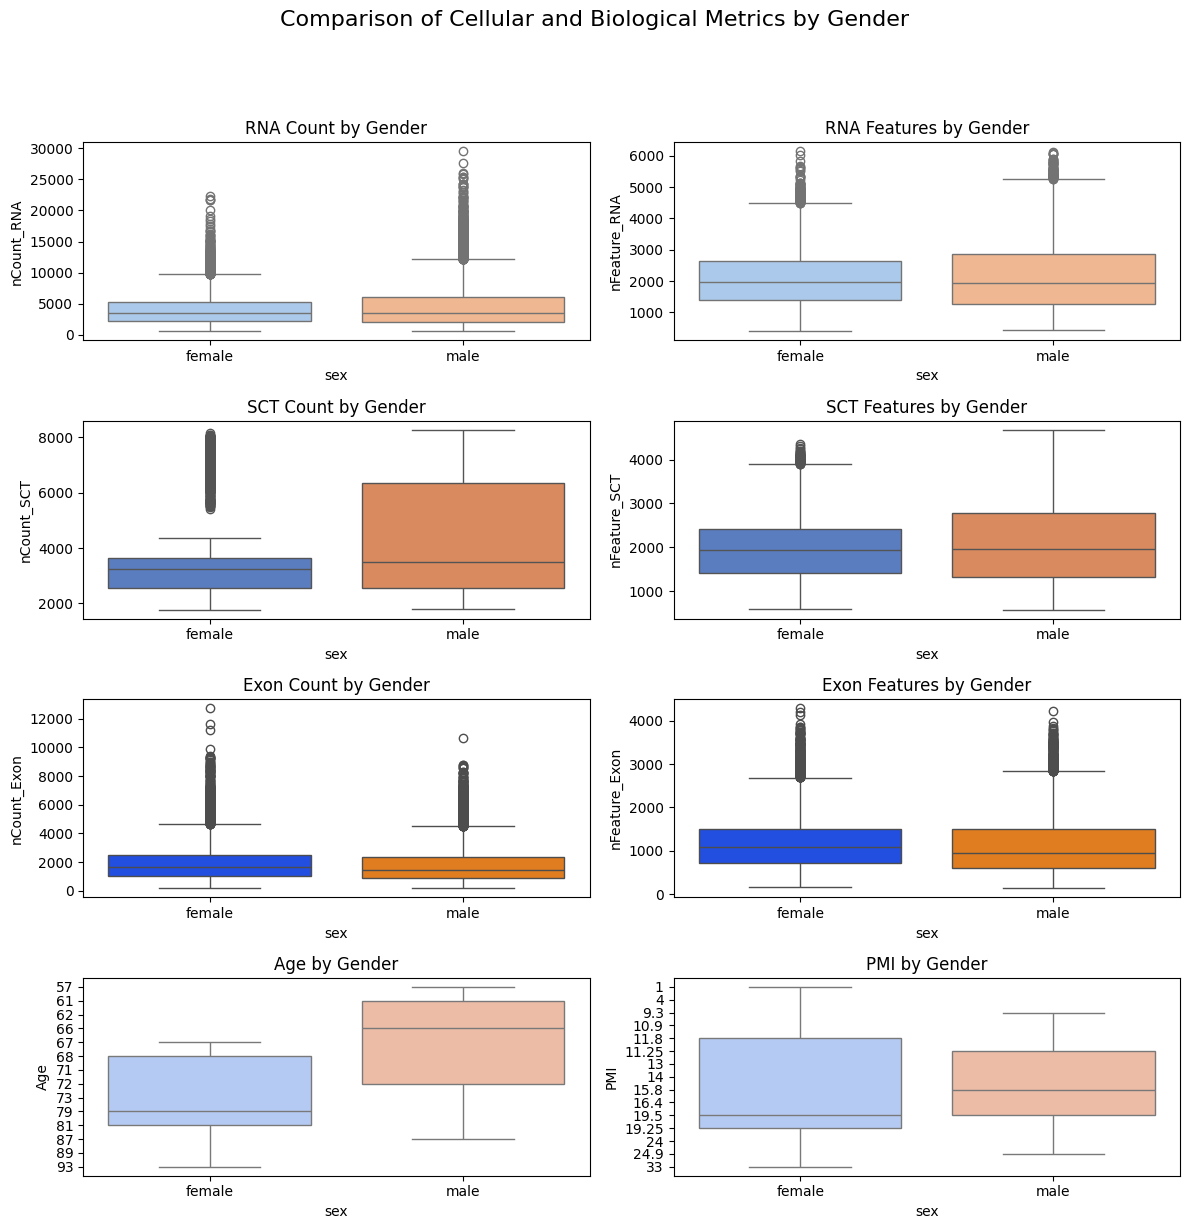

In [30]:
# Setting up the plot
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
fig.suptitle('Comparison of Cellular and Biological Metrics by Gender', fontsize=16, y=1.02)

# RNA Metrics
sns.boxplot(ax=axs[0, 0], x="sex", y="nCount_RNA", data=obs, palette="pastel")
axs[0, 0].set_title("RNA Count by Gender")
sns.boxplot(ax=axs[0, 1], x="sex", y="nFeature_RNA", data=obs, palette="pastel")
axs[0, 1].set_title("RNA Features by Gender")

# SCT Metrics
sns.boxplot(ax=axs[1, 0], x="sex", y="nCount_SCT", data=obs, palette="muted")
axs[1, 0].set_title("SCT Count by Gender")
sns.boxplot(ax=axs[1, 1], x="sex", y="nFeature_SCT", data=obs, palette="muted")
axs[1, 1].set_title("SCT Features by Gender")

# Exon Features
sns.boxplot(ax=axs[2, 0], x="sex", y="nCount_Exon", data=obs, palette="bright")
axs[2, 0].set_title("Exon Count by Gender")
sns.boxplot(ax=axs[2, 1], x="sex", y="nFeature_Exon", data=obs, palette="bright")
axs[2, 1].set_title("Exon Features by Gender")

# Age and PMI
sns.boxplot(ax=axs[3, 0], x="sex", y="Age", data=obs, palette="coolwarm")
axs[3, 0].set_title("Age by Gender")
sns.boxplot(ax=axs[3, 1], x="sex", y="PMI", data=obs, palette="coolwarm")
axs[3, 1].set_title("PMI by Gender")

# Layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

**Key Findings**

- RNA and SCT Counts: Differences in RNA and SCT counts suggest one gender may have higher baseline transcriptional activity, indicating possible variability in gene expression linked to gender.

- Exon Features: Gender-based differences in exon counts hint at potential differences in alternative splicing or gene complexity.

- Age and PMI: Age distributions vary by gender, emphasizing the need to control for age in Alzheimer’s studies, while similar PMI values across genders confirm consistent sample preservation quality.